## Peptides-Modifications Matching Problem

### Load data to a pandas dataframe

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np

%matplotlib inline

df = pd.read_csv('data', delimiter = "\t")
df

,spectrum_key,peptide_key,peptide_sequence,n_mods,p_score,d_score,modification_mass,modification_site
0,8346079174197888067,1526271875777244526,ARTKQTARKSTGGKAPRKQLATKAARKSAPATGGVKKPHRYRPGTV...,14.01565006414:1,0.000017,0.0,14.015650,4
1,8346079174197888067,1526271875777244526,ARTKQTARKSTGGKAPRKQLATKAARKSAPATGGVKKPHRYRPGTV...,14.01565006414:1,0.456230,0.0,14.015650,14
2,8346079174197888067,1526271875777244526,ARTKQTARKSTGGKAPRKQLATKAARKSAPATGGVKKPHRYRPGTV...,14.01565006414:1,0.456230,0.0,14.015650,18
3,8346079174197888067,1526271875777244526,ARTKQTARKSTGGKAPRKQLATKAARKSAPATGGVKKPHRYRPGTV...,14.01565006414:1,0.456230,0.0,14.015650,23
4,8346079174197888067,1526271875777244526,ARTKQTARKSTGGKAPRKQLATKAARKSAPATGGVKKPHRYRPGTV...,14.01565006414:1,0.456230,0.0,14.015650,27
...,...,...,...,...,...,...,...,...
15195,-2532221026069166821,5125541582210564031,MALTKQTARKSTGGKAPRKQLATKATRKSAPSTGGVKKPHRYRPGT...,42.04695019242:3_42.0105646837:4,74.811981,0.0,42.010565,15
15196,-2532221026069166821,5125541582210564031,MALTKQTARKSTGGKAPRKQLATKATRKSAPSTGGVKKPHRYRPGT...,42.04695019242:3_42.0105646837:4,74.811981,0.0,42.010565,37
15197,-2532221026069166821,5125541582210564031,MALTKQTARKSTGGKAPRKQLATKATRKSAPSTGGVKKPHRYRPGT...,42.04695019242:3_42.0105646837:4,74.811981,0.0,42.010565,19
15198,-2532221026069166821,5125541582210564031,MALTKQTARKSTGGKAPRKQLATKATRKSAPSTGGVKKPHRYRPGT...,42.04695019242:3_42.0105646837:4,99.813877,0.0,42.046950,5


#### Use as an example the last pair of (spectrum_key, peptide_key)

In [178]:
#pair1 = df.loc[(df['spectrum_key'] == -2532221026069166821) & (df['peptide_key']==5125541582210564031)]
pair1 = df.loc[(df['spectrum_key'] == -9014510415687776344)]
pair1

,spectrum_key,peptide_key,peptide_sequence,n_mods,p_score,d_score,modification_mass,modification_site
5837,-9014510415687776344,4912662101621310070,MARTKQTARKSTGGKAPRKQLATKAARKSAPATGGVKKPHRYRPGT...,28.03130012828:1_42.04695019242:1_42.0105646837:4,6.563083e-18,0.0,28.031300,5
5838,-9014510415687776344,4912662101621310070,MARTKQTARKSTGGKAPRKQLATKAARKSAPATGGVKKPHRYRPGT...,28.03130012828:1_42.04695019242:1_42.0105646837:4,6.563083e-18,0.0,28.031300,10
5839,-9014510415687776344,4912662101621310070,MARTKQTARKSTGGKAPRKQLATKAARKSAPATGGVKKPHRYRPGT...,28.03130012828:1_42.04695019242:1_42.0105646837:4,6.563083e-18,0.0,28.031300,15
5840,-9014510415687776344,4912662101621310070,MARTKQTARKSTGGKAPRKQLATKAARKSAPATGGVKKPHRYRPGT...,28.03130012828:1_42.04695019242:1_42.0105646837:4,6.563083e-18,0.0,28.031300,19
5841,-9014510415687776344,4912662101621310070,MARTKQTARKSTGGKAPRKQLATKAARKSAPATGGVKKPHRYRPGT...,28.03130012828:1_42.04695019242:1_42.0105646837:4,7.605694e-18,0.0,42.046950,10
5842,-9014510415687776344,4912662101621310070,MARTKQTARKSTGGKAPRKQLATKAARKSAPATGGVKKPHRYRPGT...,28.03130012828:1_42.04695019242:1_42.0105646837:4,7.605694e-18,0.0,42.046950,15
5843,-9014510415687776344,4912662101621310070,MARTKQTARKSTGGKAPRKQLATKAARKSAPATGGVKKPHRYRPGT...,28.03130012828:1_42.04695019242:1_42.0105646837:4,7.605694e-18,0.0,42.046950,19
5844,-9014510415687776344,4912662101621310070,MARTKQTARKSTGGKAPRKQLATKAARKSAPATGGVKKPHRYRPGT...,28.03130012828:1_42.04695019242:1_42.0105646837:4,7.605694e-18,0.0,42.046950,24
5845,-9014510415687776344,4912662101621310070,MARTKQTARKSTGGKAPRKQLATKAARKSAPATGGVKKPHRYRPGT...,28.03130012828:1_42.04695019242:1_42.0105646837:4,1.272154e-16,0.0,42.010565,5
5846,-9014510415687776344,4912662101621310070,MARTKQTARKSTGGKAPRKQLATKAARKSAPATGGVKKPHRYRPGT...,28.03130012828:1_42.04695019242:1_42.0105646837:4,1.272154e-16,0.0,42.010565,24


### Create graph model for the used example

In [179]:
#number of modification sites
n = len(pair1['modification_site'].unique().tolist())
#occurences of each modification type
modifications_num_dict = {float(x.split(':')[0]) : int(x.split(':')[1]) for x in pair1['n_mods'].iloc[1].split('_')}
#number present of modifications
k = sum(modifications_num_dict.values())

In [180]:
#list of vertices representing modification sites
A = pair1['modification_site'].unique().tolist()
#list of vertices representing modifications
D = [key for key in modifications_num_dict for i in range(modifications_num_dict[key])]
#list of graph's vertices
#vertex names: 
#      'site 10' denotes the 10-th site of the amino acid chain
#      'mod 1 occ 2' denote the second occurence of the modification of the type 1 (e.g. Oxidation)
V = A + D
keys = [key for key in modifications_num_dict]
V_names = ['site '+str(i) for i in A] + ['mod '+str(i)+' occ '+str(j) for i in range(len(keys)) for j in range(modifications_num_dict[keys[i]])]
print('Vertices:',V_names)

Vertices: ['site 5', 'site 10', 'site 15', 'site 19', 'site 24', 'site 38', 'site 28', 'site 37', 'site 0', 'mod 0 occ 0', 'mod 1 occ 0', 'mod 2 occ 0', 'mod 2 occ 1', 'mod 2 occ 2', 'mod 2 occ 3']


In [181]:
#list of graph's edges
E = []
for index, row in pair1.iterrows():
    net_edges = [(V_names[A.index(row['modification_site'])], V_names[len(A)+i], row['p_score']) for i in np.where(np.array(D)==row['modification_mass'])[0].tolist()]
    E = E + net_edges

### Use networkX library to plot the graph

In [182]:
from networkx.algorithms import bipartite
import networkx as nx

G = nx.Graph()

# Add nodes with the node attribute "bipartite"
print(V_names[:len(A)])
G.add_nodes_from(V_names[:len(A)], bipartite=0)
print(V_names[len(A):])
G.add_nodes_from(V_names[len(A):], bipartite=1)

# Add edges only between nodes of opposite node sets
G.add_weighted_edges_from(E)

['site 5', 'site 10', 'site 15', 'site 19', 'site 24', 'site 38', 'site 28', 'site 37', 'site 0']
['mod 0 occ 0', 'mod 1 occ 0', 'mod 2 occ 0', 'mod 2 occ 1', 'mod 2 occ 2', 'mod 2 occ 3']


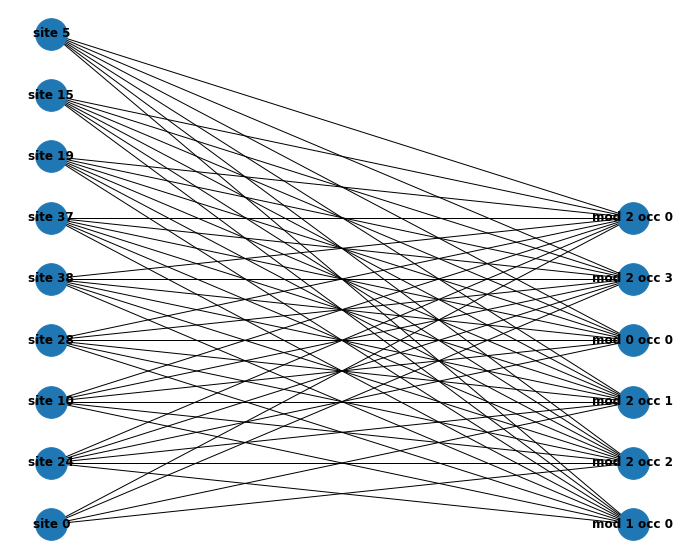

In [183]:
X, Y = bipartite.sets(G)
pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(X) ) # put nodes from X at x=1
pos.update( (n, (2, i)) for i, n in enumerate(Y) ) # put nodes from Y at x=2

f, axs = plt.subplots(1,1,figsize=(12,10))
nx.draw(G, pos=pos, node_size=1000, with_labels=True, font_weight='bold')

#Draw the weights of the edges
#labels = nx.get_edge_attributes(G,'weight')
#nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

plt.show()